# **Install Required Dependencies**

In [1]:
!git clone https://github.com/CAMeL-Lab/camel_tools.git
%cd camel_tools
!pip install .


Cloning into 'camel_tools'...
remote: Enumerating objects: 3292, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 3292 (delta 339), reused 294 (delta 293), pack-reused 2908 (from 1)
Receiving objects: 100% (3292/3292), 11.77 MiB | 1.90 MiB/s, done.
Resolving deltas: 100% (2249/2249), done.
/content/camel_tools
Processing /content/camel_tools
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 37.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!camel_data -i all

The following packages will be installed: 'dialectid-model6', 'morphology-db-msa-s31', 'disambig-ranking-cache-calima-egy-r13', 'dialectid-model26', 'disambig-ranking-cache-calima-lev-01', 'sentiment-analysis-arabert', 'disambig-bert-unfactored-egy', 'disambig-ranking-cache-calima-msa-r13', 'ner-arabert', 'morphology-db-glf-01', 'disambig-bert-unfactored-msa', 'morphology-db-lev-01', 'disambig-mle-calima-egy-r13', 'disambig-ranking-cache-calima-glf-01', 'morphology-db-msa-r13', 'disambig-mle-calima-msa-r13', 'disambig-bert-unfactored-glf', 'sentiment-analysis-mbert', 'morphology-db-egy-r13', 'disambig-bert-unfactored-lev'
Extracting package 'dialectid-model6': 100% 153M/153M [00:00<00:00, 496MB/s]
Extracting package 'morphology-db-msa-s31': 100% 44.8M/44.8M [00:00<00:00, 524MB/s]
Extracting package 'disambig-ranking-cache-calima-egy-r13': 100% 320M/320M [00:00<00:00, 528MB/s]
Extracting package 'dialectid-model26': 100% 371M/371M [00:00<00:00, 518MB/s]
Extracting package 'disambig-rank

In [3]:
!pip install pandas camel-tools transformers torch scikit-learn tensorflow datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
pip install gensim

In [5]:
pip install moviepy

# **Import the Necessary Libraries**

In [6]:
# Import necessary libraries
import os
import re
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CAMeL Tools for Arabic text normalization
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.normalize import normalize_alef_maksura_ar, normalize_teh_marbuta_ar, normalize_alef_ar

# Transformers for tokenization and model handling
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Hugging Face Dataset for processing
from datasets import Dataset

# TensorFlow and Keras for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Sklearn for clustering, encoding, and splitting
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# MoviePy and IPython for video handling
from moviepy.editor import VideoFileClip, concatenate_videoclips
from IPython.display import Video, display

# SequenceMatcher for similarity measurement
from difflib import SequenceMatcher


  if event.key is 'enter':



# **Dataset Loading**

In [7]:
#Connecting with google drive where the ArSL videos are saved
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Arabic Dataset Loading
df = pd.read_csv('/content/SP2 Dataset.csv')

# Data Viewing
print(df.head())

  Arabic text ARSL Translation
0        وردي         وردي.mp4
1         هرم          هرم.mp4
2        نجمة         نجمة.mp4
3      منشوري       منشوري.mp4
4      حلزوني       حلزوني.mp4


In [9]:
# Printing the number of duplicated values
df.duplicated().sum()

390

In [10]:
# Removing the duplicated values
index = df[df['Arabic text'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

df.duplicated().sum()

0

In [11]:
# Display the cleaned dataset
print("Dataset after removing duplicates:")
print(df)

Dataset after removing duplicates:
           Arabic text ARSL Translation
0                 وردي         وردي.mp4
1                  هرم          هرم.mp4
2                 نجمة         نجمة.mp4
3               منشوري       منشوري.mp4
4               حلزوني       حلزوني.mp4
...                ...              ...
7216  لون بخور أمي بني          بني.mp4
7217     لون القمح بني          بني.mp4
7218    لون الضوء أصفر         أصفر.mp4
7219       وردة صفراء          أصفر.mp4
7220    لون الورد أصفر         أصفر.mp4

[6739 rows x 2 columns]


# **Text preprocessing**

In [12]:
# Function to normalize Arabic text
def normalize_arabic(text):

    text = normalize_alef_ar(text) # Normalize Alef (أ, إ)
    text = normalize_alef_maksura_ar(text) # Normalize Alef Maksura (ى to ي)
    text = normalize_teh_marbuta_ar(text) # Normalize Teh Marbuta (ة to ه)

    # Remove Arabic diacritics (Tashkeel: السَّلَامُ to السلام)
    text = dediac_ar(text)

    # Handle character repetitions and redundant sequences
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    # Remove longation " الســـــلام to السلام"
    text = re.sub(r'(.)\1+', r"\1\1", text)
    return text

In [13]:
# Function to clean and preprocess text
def clean_text(text):
    if not isinstance(text, str):
        return ''  # Return an empty string for invalid text
    text = normalize_arabic(text)  # Normalize Arabic text
    text = re.sub(r'\؟', '', text)  # Remove question marks
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove leading and trailing spaces
    return text

In [14]:
# Clean the text column in the dataset
df['Cleaned Text'] = df['Arabic text'].apply(clean_text)

In [15]:
# Display the cleaned text column
print(df['Cleaned Text'])

0                   وردي
1                    هرم
2                   نجمه
3                 منشوري
4                 حلزوني
              ...       
7216    لون بخور امي بني
7217       لون القمح بني
7218      لون الضوء اصفر
7219          ورده صفراء
7220      لون الورد اصفر
Name: Cleaned Text, Length: 6739, dtype: object


# **Embedding**

In [16]:
# Load AraBERT tokenizer and model from Hugging Face
# We are using the "aubmindlab/bert-base-arabertv02" model for Arabic text processing.
# Hugging Face Hub allows us to load pre-trained models and tokenizers directly.
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")
arbert_model = AutoModel.from_pretrained("aubmindlab/bert-base-arabertv02")


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [17]:
# Function to generate embeddings for Arabic text using AraBERT
def arabert_embedding(text):
    # Tokenize the input text with padding and truncation for consistent input size
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    # Pass the tokenized input through the AraBERT model to get the hidden states
    outputs = arbert_model(**inputs)
    # Compute the average embedding across all tokens
    embedding = torch.mean(outputs.last_hidden_state, dim=1).detach().numpy()
    return embedding

In [18]:
# Generate embeddings for each sentence or word
df['embeddings'] = df['Cleaned Text'].apply(arabert_embedding)
df

,Arabic text,ARSL Translation,Cleaned Text,embeddings
0,وردي,وردي.mp4,وردي,"[[0.08858308, 1.101803, -0.11527638, -0.029373..."
1,هرم,هرم.mp4,هرم,"[[0.30180296, 0.30441204, 0.07250378, -0.24996..."
2,نجمة,نجمة.mp4,نجمه,"[[0.6738618, 0.53124833, -0.33979365, -0.76894..."
3,منشوري,منشوري.mp4,منشوري,"[[0.14934044, 2.2753265, -0.24806216, -0.75950..."
4,حلزوني,حلزوني.mp4,حلزوني,"[[-0.42178822, -0.24025111, 0.068188034, -0.21..."
...,...,...,...,...
7216,لون بخور أمي بني,بني.mp4,لون بخور امي بني,"[[-0.27970102, 0.58552295, -0.35765252, -1.238..."
7217,لون القمح بني,بني.mp4,لون القمح بني,"[[-0.36488003, 1.2816865, -0.33933485, -1.0912..."
7218,لون الضوء أصفر,أصفر.mp4,لون الضوء اصفر,"[[-0.22202693, 0.9311549, 0.5140298, -0.021501..."
7219,وردة صفراء,أصفر.mp4,ورده صفراء,"[[-0.65450233, 1.1900728, -0.4612173, 0.603976..."


# **Data Clustring**

In [19]:
# Identify words (single token) and sentences (multiple tokens) based on the number of words
df['is_word'] = df['Cleaned Text'].apply(lambda x: len(x.split()) == 1)

# Split the dataset into words and sentences
words_df = df[df['is_word']]  # Dataframe containing words
sentences_df = df[~df['is_word']]  # Dataframe containing sentences

# Define the number of clusters for words and sentences
num_word_clusters = 5
num_sentence_clusters = 10

# Perform clustering for words
word_embeddings_matrix = np.vstack(words_df['embeddings'].values)
word_cluster = AgglomerativeClustering(n_clusters=num_word_clusters)
words_df['Cluster'] = word_cluster.fit_predict(word_embeddings_matrix)

# Perform clustering for sentences
sentence_embeddings_matrix = np.vstack(sentences_df['embeddings'].values)
sentence_cluster = AgglomerativeClustering(n_clusters=num_sentence_clusters)
sentences_df['Cluster'] = sentence_cluster.fit_predict(sentence_embeddings_matrix)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_df['Cluster'] = word_cluster.fit_predict(word_embeddings_matrix)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentences_df['Cluster'] = sentence_cluster.fit_predict(sentence_embeddings_matrix)



In [20]:
# Combine words and sentences into the original dataframe
df = pd.concat([words_df, sentences_df]).sort_index()
df


,Arabic text,ARSL Translation,Cleaned Text,embeddings,is_word,Cluster
0,وردي,وردي.mp4,وردي,"[[0.08858308, 1.101803, -0.11527638, -0.029373...",True,3
1,هرم,هرم.mp4,هرم,"[[0.30180296, 0.30441204, 0.07250378, -0.24996...",True,0
2,نجمة,نجمة.mp4,نجمه,"[[0.6738618, 0.53124833, -0.33979365, -0.76894...",True,0
3,منشوري,منشوري.mp4,منشوري,"[[0.14934044, 2.2753265, -0.24806216, -0.75950...",True,1
4,حلزوني,حلزوني.mp4,حلزوني,"[[-0.42178822, -0.24025111, 0.068188034, -0.21...",True,2
...,...,...,...,...,...,...
7216,لون بخور أمي بني,بني.mp4,لون بخور امي بني,"[[-0.27970102, 0.58552295, -0.35765252, -1.238...",False,5
7217,لون القمح بني,بني.mp4,لون القمح بني,"[[-0.36488003, 1.2816865, -0.33933485, -1.0912...",False,4
7218,لون الضوء أصفر,أصفر.mp4,لون الضوء اصفر,"[[-0.22202693, 0.9311549, 0.5140298, -0.021501...",False,4
7219,وردة صفراء,أصفر.mp4,ورده صفراء,"[[-0.65450233, 1.1900728, -0.4612173, 0.603976...",False,2


In [21]:
# Group and display phrases for each cluster
for cluster_label in df['Cluster'].unique():
    print(f"\nCluster {cluster_label}:")  # Print the cluster label
    # Get all phrases in the current cluster
    cluster_phrases = df[df['Cluster'] == cluster_label]['Cleaned Text']
    # Print each phrase in the cluster
    for phrase in cluster_phrases:
        print(f"- {phrase}")



Streaming output truncated to the last 5000 lines.
- اعاقه سمعيه مشكله خطيره
- اعاقه ذهنيه شديده
- اعاقه ذهنيه بسيطه
- اعاقه ذهنيه خطيره
- الاعاقات الذهنيه الدارجه
- اعاقه في الذهن
- معاق ذهنيا
- اعاقه في الجسد
- اعاقات جسديه خطيره
- معاق جسديا
- اعاقه جسديه حرجه
- اعاقه جسديه خطيره
- برنامجك المفضل
- ماهي برامجك المفضله حاليا
- متي يعرض البرنامج
- اعرض اعمالك
- كيف اعرض اعمالي
- يحفظون اموالك من الضياع
- ادخلا المنزل بسرعه
- تشهد ان لا اله الا الله
- الجري شيء اساسي
- اموالي في حسابي البنكي
- ماهي هوايتك المفضله
- كيف حالك امس
- ناقشني في موضوع
- اذهب للحديقه للمرح
- ما اخر اخبارك
- كيف اخبارك
- ايش اخبارك
- عمل شاق
- عمل مرهق
- عمل في وقت مبكر
- عمل في وقت متاخر
- اعمالي الخاصه
- الجو غائم جدا
- الجو غائم و ممطر
- السماء غائمه
- انفتح الباب فجاه
- انغلق الباب فجاه
- متعصب و متنمر
- اتجاه الطريق المنحدر
- استعانه بصديق
- حافظ علي نظافه اسنانك
- هل عندك مشكله
- عندي مشكله
- لدي مشاكل
- ماهي مشكلتك
- حلول للمشكله
- مشاكل مستقبليه
- مجال و تخصص معين
- مرجع لك في الدراسه
- عمل متواصل
- مج

# **LSTM Model (Before Fine-Tuning)**

In [22]:
# Prepare training data
X = np.array(df['embeddings'].tolist())  # Convert embeddings column to a numpy array
y = df['Cluster'].values  # Extract cluster labels

# Encode cluster labels into categorical format for multi-class classification
y_categorical = to_categorical(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Define the LSTM model architecture
embedding_dim = X_train.shape[2]  # Embedding dimension from input data
num_classes = y_train.shape[1]    # Number of clusters (output classes)

# Build a sequential model
model = Sequential()
model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(None, embedding_dim)))  # First LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=False)))  # Second LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

# Compile the model with Adam optimizer and a small learning rate
optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  super().__init__(**kwargs)



In [23]:
# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, None, 512)           │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,758,154 (10.52 MB)

 Trainable params: 2,758,154 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Add early stopping to stop training when validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 consecutive epochs
    restore_best_weights=True  # Restore model weights from the best epoch
)

# Train the LSTM model
print("\nTraining LSTM model before fine-tuning AraBERT:\n")
history_before = model.fit(
    X_train, y_train,  # Training data
    epochs=50,  # Maximum number of epochs
    batch_size=32,  # Batch size for training
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[early_stopping]  # Apply early stopping
)


Training LSTM model before fine-tuning AraBERT:

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2089 - loss: 2.2399 - val_accuracy: 0.2685 - val_loss: 2.0918
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2870 - loss: 2.0460 - val_accuracy: 0.2745 - val_loss: 1.9263
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2897 - loss: 1.9125 - val_accuracy: 0.3309 - val_loss: 1.8185
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3415 - loss: 1.8218 - val_accuracy: 0.3991 - val_loss: 1.7096
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4018 - loss: 1.6804 - val_accuracy: 0.4763 - val_loss: 1.5887
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4677 - loss: 1.5727 - val_accuracy: 0.5326 - val_loss: 1.4669
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 1.4397 - val_accuracy: 0.5772 - val_loss: 1.3509
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step -

In [25]:
#Evaluate the model on the validation set
val_loss_before, val_accuracy_before = model.evaluate(X_val, y_val)
print(f'Validation Loss (Before Fine-Tuning): {val_loss_before}, Validation Accuracy (Before Fine-Tuning): {val_accuracy_before}')

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8046 - loss: 0.5994
Validation Loss (Before Fine-Tuning): 0.6038839817047119, Validation Accuracy (Before Fine-Tuning): 0.7885756492614746


In [26]:
# Extract all unique phrases from the "Arabic text" column
"""
Extract all unique phrases from the "Arabic text" column
This ensures that phrases already present in the dataset are preserved as single token
and are not further tokenized by the model during processing.

This ensures that phrases like "صباح الخير," which have a corresponding video path,
are treated as a single token during processing to maintain their meaning and mapping.

"""
dataset_phrases = df['Arabic text'].unique().tolist()

In [27]:
"""
The clean_user_input function processes a user-provided Arabic text by:

1. Sorting dataset phrases to prioritize multi-word phrases during matching.
2. Removing English letters and digits from the input.
3. Normalizing and cleaning the text using predefined cleaning rules.
4. Ensuring phrases present in the dataset are treated as single tokens by replacing spaces
 in those phrases with underscores (e.g., "صباح الخير" becomes "صباح_الخير").
5. Splitting the text into individual tokens while restoring the original phrases

"""

# Function to clean and normalize user input
def clean_user_input(text):
    # Sort phrases by length to match longer phrases first (to capture multi-word phrases first)
    sorted_phrases = sorted(dataset_phrases, key=len, reverse=True)

    # Remove English letters
    text = re.sub('[A-Za-z]+', ' ', text)

    # Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    # Apply additional text normalization and cleaning (from clean_text function)
    text = clean_text(text)
    print("Cleaned Text:", text)

    # Replace each phrase in the text with a unique marker if it exists in the dataset
    for phrase in sorted_phrases:
        if phrase in text:
            text = text.replace(phrase, phrase.replace(" ", "_"))

    # Split the cleaned text into tokens
    tokens = text.split()

    # Replace markers back to original phrases
    tokens = [token.replace("_", " ") for token in tokens]
    print("Tokenized Text:", tokens)

    return tokens

In [28]:
"""
This function processes a user-provided Arabic sentence to predict video paths for each token.

1. Cleans and normalizes the input text to preserve dataset phrases as single tokens.
2. Generates embeddings for each token using AraBERT.
3. Predicts the cluster for each token using the trained LSTM model.
4. Calculates cosine similarity within the predicted cluster to find the most similar phrase.
5. Retrieves the corresponding video path for the matched phrase or returns "No video path found" if unmatched.

Example:
Input: "صباح الخير كيف الحال"
Output:
- Word: "صباح الخير", Video Path: "path_to_video1.mp4"
- Word: "كيف", Video Path: "path_to_video2.mp4"
- Word: "الحال", Video Path: "path_to_video3.mp4"

"""

# Function to make predictions and retrieve video paths
def predict_and_retrieve_videos(input_sentence, tokenizer, arbert_model, lstm_model):
    # Clean the user input
    cleaned_tokens = clean_user_input(input_sentence)

    # Initialize an empty list to store the video paths for each word
    video_paths = []

    #  Process each word/token from the cleaned input
    for word in cleaned_tokens:
        #  Generate embedding for the word using AraBERT
        word_embedding = arabert_embedding(word)
        word_embedding = np.expand_dims(word_embedding, axis=0)  # Add batch dimension

        #  Predict the cluster using the trained LSTM model
        predicted_cluster = lstm_model.predict(word_embedding)
        cluster_index = np.argmax(predicted_cluster)

        # Retrieve the most similar video path from the predicted cluster
        similar_phrases = df[df['Cluster'] == cluster_index]
        if not similar_phrases.empty:
            # Calculate cosine similarity between the word embedding and each embedding in the cluster
            similarities = []
            for index, row in similar_phrases.iterrows():
                cluster_embedding = row['embeddings']
                similarity = np.dot(word_embedding[0], cluster_embedding[0]) / (
                    np.linalg.norm(word_embedding[0]) * np.linalg.norm(cluster_embedding[0]))
                similarities.append(similarity)

            # Find the video path with the highest similarity
            most_similar_index = np.argmax(similarities)
            video_path = similar_phrases.iloc[most_similar_index]['ARSL Translation']
            video_paths.append((word, video_path))
        else:
            video_paths.append((word, "No video path found"))

    # Display the results
    print("\nProcessed Tokens:")
    for word in cleaned_tokens:
        print(word)

    print("\nVideo Paths for Each Token:")
    for word, path in video_paths:
        print(f'Word: "{word}", Video Path: "{path}"')


In [29]:
# Function to clean and normalize user input
def clean_user_input(text):
    # Sort phrases by length to match longer phrases first (to capture multi-word phrases first)
    sorted_phrases = sorted(dataset_phrases, key=len, reverse=True)



    # Remove English letters
    text = re.sub('[A-Za-z]+', ' ', text)

    # Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    # Apply additional text normalization and cleaning (from clean_text function)
    text = clean_text(text)

    # Replace each phrase in the text with a unique marker if it exists in the dataset
    for phrase in sorted_phrases:
        if phrase in text:
            text = text.replace(phrase, phrase.replace(" ", "_"))

    # Split the cleaned text into tokens
    tokens = text.split()

    # Replace markers back to original phrases
    tokens = [token.replace("_", " ") for token in tokens]

    return tokens

# Function to make predictions and retrieve video paths
def predict_and_retrieve_videos(input_sentence, tokenizer, arbert_model, lstm_model):
    # Step 1: Clean the user input
    cleaned_tokens = clean_user_input(input_sentence)

    # Step 2: Initialize an empty list to store the video paths for each word
    video_paths = []

    # Step 3: Process each word/token from the cleaned input
    for word in cleaned_tokens:
        # Step 3.1: Generate embedding for the word using AraBERT
        word_embedding = arabert_embedding(word)
        word_embedding = np.expand_dims(word_embedding, axis=0)  # Add batch dimension

        # Step 3.2: Predict the cluster using the trained LSTM model
        predicted_cluster = lstm_model.predict(word_embedding)
        cluster_index = np.argmax(predicted_cluster)

        # Step 3.3: Retrieve the most similar video path from the predicted cluster
        similar_phrases = df[df['Cluster'] == cluster_index]
        if not similar_phrases.empty:
            # Calculate cosine similarity between the word embedding and each embedding in the cluster
            similarities = []
            for index, row in similar_phrases.iterrows():
                cluster_embedding = row['embeddings']
                similarity = np.dot(word_embedding[0], cluster_embedding[0]) / (
                    np.linalg.norm(word_embedding[0]) * np.linalg.norm(cluster_embedding[0]))
                similarities.append(similarity)

            # Find the video path with the highest similarity
            most_similar_index = np.argmax(similarities)
            video_path = similar_phrases.iloc[most_similar_index]['ARSL Translation']
            video_paths.append((word, video_path))
        else:
            video_paths.append((word, "No video path found"))

    # Display the results
    print("\nProcessed Tokens:")
    for word in cleaned_tokens:
        print(word)

    print("\nVideo Paths for Each Token:")
    for word, path in video_paths:
        print(f'Word: "{word}", Video Path: "{path}"')




In [30]:
# Allow user to input a new Arabic sentence
new_sentence = input("Enter an Arabic sentence: ")  # User can type any Arabic sentence

# Predict clusters and retrieve corresponding video paths for each word in the sentence
predict_and_retrieve_videos(new_sentence, tokenizer, arbert_model, model)

Enter an Arabic sentence: انا اليوم سعيدة
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Processed Tokens:
انا
اليوم
سعيده

Video Paths for Each Token:
Word: "انا", Video Path: "أنا.mp4"
Word: "اليوم", Video Path: "الاثنين.mp4"
Word: "سعيده", Video Path: "سعيد.mp4"


**Evalute the model performance**

In [31]:
# Predict on validation set
# Model outputs probabilities for each class
y_pred_probs = model.predict(X_val)
# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)
# Convert one-hot encoded true labels to class indices
y_true = np.argmax(y_val, axis=1)

# Generate a classification report
# Output precision, recall, and F1-score for each cluster
report = classification_report(
    y_true, y_pred,
    target_names=[f"Cluster {i}" for i in range(num_classes)],
    output_dict=True
)

# Convert the classification report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()
# Retain only key metrics and round values to two decimal places
report_df = report_df[['precision', 'recall', 'f1-score']].round(2)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [32]:
# Print the classification report
print("\nClassification Report:")
print(report_df)


Classification Report:
              precision  recall  f1-score
Cluster 0          0.79    0.83      0.81
Cluster 1          0.82    0.82      0.82
Cluster 2          0.74    0.82      0.78
Cluster 3          0.78    0.71      0.74
Cluster 4          0.74    0.71      0.73
Cluster 5          0.90    0.82      0.86
Cluster 6          0.95    1.00      0.97
Cluster 7          1.00    1.00      1.00
Cluster 8          0.74    0.78      0.76
Cluster 9          0.68    0.41      0.51
accuracy           0.79    0.79      0.79
macro avg          0.81    0.79      0.80
weighted avg       0.79    0.79      0.79


# **AraBERT Fine-tuning**



In [33]:
"""
This step fine-tunes AraBERT on a dataset to classify text into predefined clusters.

1. Dataset Preparation: The dataset is converted into a format compatible with Hugging Face's `datasets` library.
 The columns are renamed to "text" (input text) and "label" (cluster ID).
2. Tokenization: Each input text is tokenized using the AraBERT tokenizer, with padding and truncation to ensure uniform input size.
3. Fine-Tuning:
   - The AraBERT model is loaded for sequence classification with the number of output labels equal to the total clusters (word clusters + sentence clusters).
   - The `Trainer` class is used for training, leveraging pre-trained AraBERT weights while adapting the model to the dataset's clustering task.
4. Saving the Model: After training, the fine-tuned AraBERT model and tokenizer are saved for future use in predictions or further fine-tuning.
"""


# Disable WandB (optional logging framework)
os.environ["WANDB_DISABLED"] = "true"

# Create a Hugging Face Dataset from the DataFrame
# Rename columns to "text" and "label" for compatibility
dataset = Dataset.from_pandas(df[['Cleaned Text', 'Cluster']].rename(columns={'Cleaned Text': 'text', 'Cluster': 'label'}))

# Define a tokenization function
def tokenize_function(examples):
    # Tokenize text with padding and truncation
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Tokenize the entire dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Load AraBERT for sequence classification with the number of clusters as labels
model = AutoModelForSequenceClassification.from_pretrained(
    "aubmindlab/bert-base-arabertv02", num_labels=num_word_clusters + num_sentence_clusters
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",  # Directory to save model checkpoints and results
    evaluation_strategy="epoch",  # Evaluate after every epoch
    learning_rate=2e-5,  # Learning rate for fine-tuning
    per_device_train_batch_size=16,  # Batch size per device
    num_train_epochs=3,  # Number of epochs
    weight_decay=0.01,  # Weight decay for regularization
    logging_dir='./logs',  # Directory to save logs
    logging_steps=10  # Log every 10 steps
)

# Initialize the Trainer for fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,  # Training dataset
    eval_dataset=tokenized_dataset,  # Evaluation dataset
)

# Train the model
trainer.train()

# Save the fine-tuned model and tokenizer for future use
model.save_pretrained('./fine_tuned_arabert')
tokenizer.save_pretrained('./fine_tuned_arabert')

Map:   0%|          | 0/6739 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  warnings.warn(

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,0.937300,0.766811
2,0.611700,0.434994
3,0.477700,0.317289


('./fine_tuned_arabert/tokenizer_config.json',
 './fine_tuned_arabert/special_tokens_map.json',
 './fine_tuned_arabert/vocab.txt',
 './fine_tuned_arabert/added_tokens.json',
 './fine_tuned_arabert/tokenizer.json')

In [34]:
"""
This step generates embeddings using the fine-tuned AraBERT model and retrains the LSTM model with updated clusters.

1. **Generate New Embeddings**:
   - Load the fine-tuned AraBERT model and tokenizer.
   - Generate embeddings for the dataset's "Cleaned Text" column using the fine-tuned model.

2. **Prepare Data for Retraining**:
   - Use the updated embeddings and cluster labels as inputs for the LSTM model.
   - Split the data into training and validation sets.

3. **Define and Compile the LSTM Model**:
   - The LSTM model is redefined to accommodate the updated embedding dimensions and clusters.
   - Includes bidirectional LSTM layers, dropout for regularization, and a dense output layer.

4. **Train the LSTM Model**:
   - Train the LSTM model with early stopping to prevent overfitting.
   - Use the validation set for periodic evaluation during training.

5. **Evaluate the Model**:
   - After training, evaluate the LSTM model on the validation set to measure loss and accuracy.
"""

'\nThis step generates embeddings using the fine-tuned AraBERT model and retrains the LSTM model with updated clusters.\n\n1. **Generate New Embeddings**:\n   - Load the fine-tuned AraBERT model and tokenizer.\n   - Generate embeddings for the dataset\'s "Cleaned Text" column using the fine-tuned model.\n\n2. **Prepare Data for Retraining**:\n   - Use the updated embeddings and cluster labels as inputs for the LSTM model.\n   - Split the data into training and validation sets.\n\n3. **Define and Compile the LSTM Model**:\n   - The LSTM model is redefined to accommodate the updated embedding dimensions and clusters.\n   - Includes bidirectional LSTM layers, dropout for regularization, and a dense output layer.\n\n4. **Train the LSTM Model**:\n   - Train the LSTM model with early stopping to prevent overfitting.\n   - Use the validation set for periodic evaluation during training.\n\n5. **Evaluate the Model**:\n   - After training, evaluate the LSTM model on the validation set to measure

In [35]:
# Load the fine-tuned AraBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('./fine_tuned_arabert')
arbert_model = AutoModel.from_pretrained('./fine_tuned_arabert')

**LSTM Model (After Fine-Tuning)**

In [36]:
# Generate updated embeddings for each phrase or word in the dataset
df['embeddings'] = df['Cleaned Text'].apply(arabert_embedding)

# Retrain the LSTM Model with Updated Clusters
# Prepare the training data using updated embeddings and labels
X = np.array(df['embeddings'].tolist())  # Convert embeddings to numpy array
y = df['Cluster'].values  # Use updated cluster labels

# Encode the labels into categorical format
y_categorical = to_categorical(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val_after = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Define the LSTM model (updated for fine-tuned embeddings)
embedding_dim = X_train.shape[2]  # Embedding dimension from input data
num_classes = y_train.shape[1]    # Number of output classes (clusters)

# Build the sequential LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(None, embedding_dim)))  # First LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=False)))  # Second LSTM layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax for classification

# Compile the model with a lower learning rate for fine-tuned embeddings
optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  super().__init__(**kwargs)



In [37]:
# Display the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, None, 512)           │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,758,154 (10.52 MB)

 Trainable params: 2,758,154 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Add early stopping to stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM model with early stopping
print("\nTraining LSTM model after fine-tuning AraBERT:\n")
history_after = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val_after),
    callbacks=[early_stopping]
)


Training LSTM model after fine-tuning AraBERT:

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4174 - loss: 2.1647 - val_accuracy: 0.6484 - val_loss: 1.7839
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6528 - loss: 1.6501 - val_accuracy: 0.7240 - val_loss: 1.2139
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7574 - loss: 1.1125 - val_accuracy: 0.8056 - val_loss: 0.8342
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8176 - loss: 0.7782 - val_accuracy: 0.8412 - val_loss: 0.6273
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8547 - loss: 0.5921 - val_accuracy: 0.8776 - val_loss: 0.5119
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8835 - loss: 0.4855 - val_accuracy: 0.8924 - val_loss: 0.4448
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8968 - loss: 0.4169 - val_accuracy: 0.8984 - val_loss: 0.4021
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - 

**Evalute the model performance**

In [39]:
# Evaluate the LSTM model on the validation set
val_loss_after, val_accuracy_after = model.evaluate(X_val, y_val_after)
print(f'Validation Loss (After Fine-Tuning): {val_loss_after}, Validation Accuracy (After Fine-Tuning): {val_accuracy_after}')

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9141 - loss: 0.2759
Validation Loss (After Fine-Tuning): 0.2687695324420929, Validation Accuracy (After Fine-Tuning): 0.9183976054191589


In [40]:
# Predict on validation set
# Model outputs probabilities for each class
y_pred_probs = model.predict(X_val)
# Convert probabilities to predicted class labels
y_pred_after = np.argmax(y_pred_probs, axis=1)
# Convert one-hot encoded true labels to class indices
y_true = np.argmax(y_val_after, axis=1)

# Generate a classification report
# Output precision, recall, and F1-score for each cluster
report = classification_report(
    y_true, y_pred_after,
    target_names=[f"Cluster {i}" for i in range(num_classes)],
    output_dict=True
)

# Convert the classification report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()
# Retain only key metrics and round values to two decimal places
report_df = report_df[['precision', 'recall', 'f1-score']].round(2)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


# **Prediction Of The Model**


In [41]:
# Function to measure similarity between two strings
def similarity_ratio(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [42]:
# Function to preprocess the input text and predict using the fine-tuned LSTM model
def predict_videos(user_input, fine_tuned_model, df):
    tokenized_user_input = clean_user_input(user_input)
    video_paths = []
    similarity_scores = []

    video_folder = '/content/drive/MyDrive/SeniorProject_2/videos'

    for token in tokenized_user_input:
        print(f"\nProcessing token '{token}'...")
        word_embedding = arabert_embedding(token)
        word_embedding = np.expand_dims(word_embedding, axis=0)

        predicted_cluster = fine_tuned_model.predict(word_embedding)
        cluster_index = np.argmax(predicted_cluster)

        similar_phrases = df[df['Cluster'] == cluster_index]
        if not similar_phrases.empty:
            similarities_list = []
            for index, row in similar_phrases.iterrows():
                cluster_embedding = row['embeddings'].flatten()
                word_embedding_vector = word_embedding[0].flatten()

                similarity = np.dot(word_embedding_vector, cluster_embedding) / (
                    np.linalg.norm(word_embedding_vector) * np.linalg.norm(cluster_embedding))
                similarities_list.append(similarity)

            most_similar_index = np.argmax(similarities_list)
            predicted_class = similar_phrases.iloc[most_similar_index]['ARSL Translation']
            predicted_phrase = similar_phrases.iloc[most_similar_index]['Arabic text']
            predicted_class_without_extension = predicted_class.replace('.mp4', '')

            # Calculate similarity between token and predicted class
            similarity = similarity_ratio(token, predicted_class_without_extension)
            print(f"Predicted class for '{token}': '{predicted_class}' (Similarity: {similarity * 100:.2f}%)")

            if similarity >= 0.50:
                # High similarity, fetch the video directly
                video_path = os.path.join(video_folder, predicted_class)
                if os.path.exists(video_path):
                    video_paths.append(video_path)
                    print(f"Direct match (50%+ similarity) found for token '{token}'. Playing video: {video_path}")
                else:
                    print(f"Video file not found: {video_path}")
            else:
                # Low similarity, apply fingerspelling
                print(f"Low similarity for token '{token}' (Similarity: {similarity * 100:.2f}%). Applying fingerspelling.")
                for char in token:
                    char_video_path = os.path.join(video_folder, f"{char}.mp4")
                    if os.path.exists(char_video_path):
                        video_paths.append(char_video_path)
                        print(f"Playing fingerspell video for '{char}': {char_video_path}")
                    else:
                        print(f"No video found for character '{char}' in dataset.")
        else:
            print(f"No cluster match found for token '{token}'. Applying fingerspelling:")
            for char in token:
                char_video_path = os.path.join(video_folder, f"{char}.mp4")
                if os.path.exists(char_video_path):
                    video_paths.append(char_video_path)
                    print(f"Playing fingerspell video for '{char}': {char_video_path}")
                else:
                    print(f"No video found for character '{char}' in dataset.")

    return video_paths


In [46]:
# Allow user to input Arabic text
user_input = input("Enter Arabic text: ")

# Predict and retrieve video paths for each token
video_paths = predict_videos(user_input, model, df)

Enter Arabic text: السلام عليكم كيف حالك

Processing token 'السلام عليكم'...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class for 'السلام عليكم': 'السلام عليكم.mp4' (Similarity: 100.00%)
Direct match (50%+ similarity) found for token 'السلام عليكم'. Playing video: /content/drive/MyDrive/SeniorProject_2/videos/السلام عليكم.mp4

Processing token 'كيف حالك'...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class for 'كيف حالك': 'كيف حالك.mp4' (Similarity: 100.00%)
Direct match (50%+ similarity) found for token 'كيف حالك'. Playing video: /content/drive/MyDrive/SeniorProject_2/videos/كيف حالك.mp4


In [47]:
def combine_videos(video_paths, output_path="combined_output.mp4"):
    """
    The predict_videos function retrieves a single video path for each token in the input text,
    while the combine_videos function concatenates these videos into one video to represent the full phrase or sentence.
    """
    clips = []
    for video_path in video_paths:
        if os.path.exists(video_path):
            try:
                clips.append(VideoFileClip(video_path))
            except Exception as e:
                print(f"Error loading video {video_path}: {e}")
    if clips:
        # Combine the video clips
        final_clip = concatenate_videoclips(clips, method="compose")
        # Write the combined video to a file
        final_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")
        print(f"Combined video saved as {output_path}")
        return output_path
    else:
        print("No valid videos to combine.")
        return None

# Use video_paths from the previous output
# Make sure the variable `video_paths` is already defined in a previous cell
if 'video_paths' in locals() or 'video_paths' in globals():
    # Combine all videos into one
    output_video_path = "combined_output.mp4"
    combined_video = combine_videos(video_paths, output_path=output_video_path)

    # Display the combined video
    if combined_video:
        display(Video(combined_video, embed=True, width=800, height=600))
else:
    print("Error: 'video_paths' variable is not defined. Please run the previous cell to generate it.")


t:  36%|███▌      | 319/891 [00:51<00:17, 32.97it/s, now=None]

Moviepy - Building video combined_output.mp4.
Moviepy - Writing video combined_output.mp4




t:  36%|███▌      | 319/891 [00:58<00:17, 32.97it/s, now=None]

Moviepy - Done !
Moviepy - video ready combined_output.mp4
Combined video saved as combined_output.mp4


# **The Model Evalution Graphs**

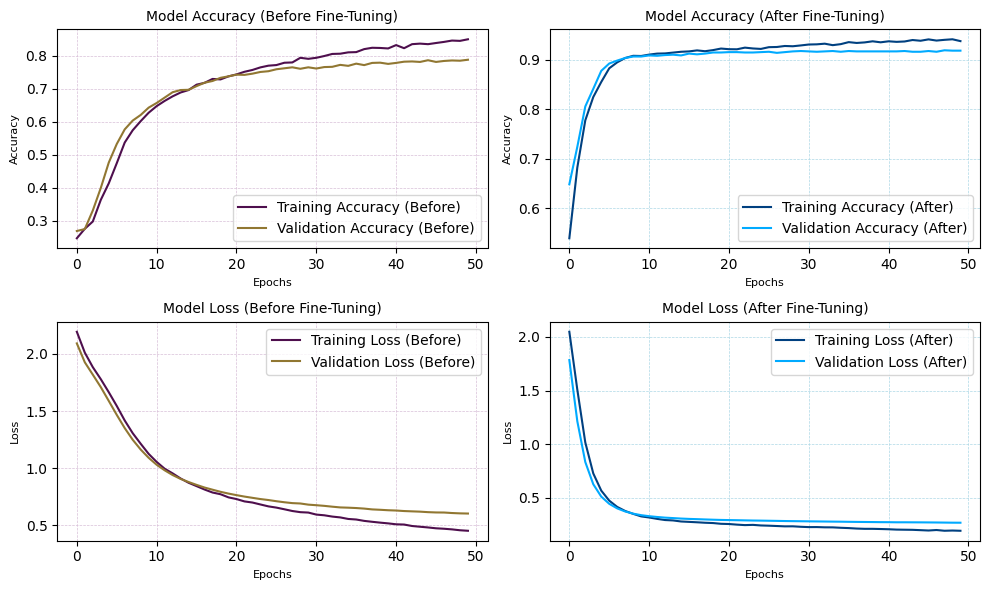

In [48]:

'''
"""
The plots compare the model's performance before and after fine-tuning using
training and validation accuracy and loss
'''
# Plot both loss and accuracy before and after fine-tuning
plt.figure(figsize=(10, 6))

# Subplot for Accuracy Before and After Fine-Tuning
plt.subplot(2, 2, 1)
plt.plot(history_before.history['accuracy'], label='Training Accuracy (Before)', color='#4e0f4d')  # Purple
plt.plot(history_before.history['val_accuracy'], label='Validation Accuracy (Before)', color='#917732')  # Light Purple
plt.title('Model Accuracy (Before Fine-Tuning)', fontsize=10)
plt.xlabel('Epochs', fontsize=8)
plt.ylabel('Accuracy', fontsize=8)
plt.legend()
plt.grid(True, color='#D8BFD8', linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)
plt.plot(history_after.history['accuracy'], label='Training Accuracy (After)', color='#004080')  # Blue
plt.plot(history_after.history['val_accuracy'], label='Validation Accuracy (After)', color='#00aaff')  # Light Blue
plt.title('Model Accuracy (After Fine-Tuning)', fontsize=10)
plt.xlabel('Epochs', fontsize=8)
plt.ylabel('Accuracy', fontsize=8)
plt.legend()
plt.grid(True, color='#ADD8E6', linestyle='--', linewidth=0.5)

# Subplot for Loss Before and After Fine-Tuning
plt.subplot(2, 2, 3)
plt.plot(history_before.history['loss'], label='Training Loss (Before)', color='#4e0f4d')  # Purple
plt.plot(history_before.history['val_loss'], label='Validation Loss (Before)', color='#917732')  # Light Purple
plt.title('Model Loss (Before Fine-Tuning)', fontsize=10)
plt.xlabel('Epochs', fontsize=8)
plt.ylabel('Loss', fontsize=8)
plt.legend()
plt.grid(True, color='#D8BFD8', linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 4)
plt.plot(history_after.history['loss'], label='Training Loss (After)', color='#004080')  # Blue
plt.plot(history_after.history['val_loss'], label='Validation Loss (After)', color='#00aaff')  # Light Blue
plt.title('Model Loss (After Fine-Tuning)', fontsize=10)
plt.xlabel('Epochs', fontsize=8)
plt.ylabel('Loss', fontsize=8)
plt.legend()
plt.grid(True, color='#ADD8E6', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


Before fine-tuning, the model shows steady improvements, indicating limited generalization and slight underfitting. In contrast, after fine-tuning, the model achieves significantly higher accuracy and much lower loss, with closely aligned training and validation curves. This demonstrates that fine-tuning greatly enhanced the model's learning capacity, improved generalization to unseen data, and reduced overfitting, resulting in a more robust and accurate model.

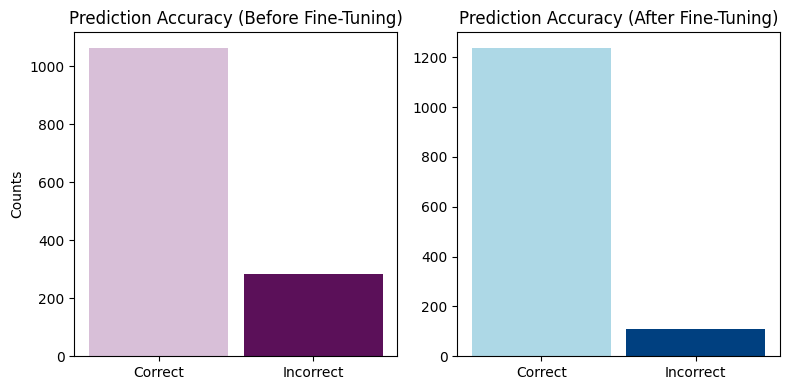

In [50]:
'''
The plots show the model's correct and incorrect
predictions before and after fine-tuning.
'''
# Calculate prediction accuracy before and after fine-tuning
y_true_before = np.argmax(y_val, axis=1)
num_correct_before = sum(y_true_before == y_pred)
num_total_before = len(y_val)

# Convert y_val_after to class labels using argmax
y_true_after = np.argmax(y_val_after, axis=1)
num_correct_after = sum(y_true_after == y_pred_after)
num_total_after = len(y_val_after)

# Data for visualization
categories = ['Correct', 'Incorrect']
counts_before = [num_correct_before, num_total_before - num_correct_before]
counts_after = [num_correct_after, num_total_after - num_correct_after]


colors_before = ['#D8BFD8', '#5b1059']  # Light purple and purple
colors_after = ['#ADD8E6', '#004080']  # Light blue and blue

# Plot bar charts for before and after fine-tuning
plt.figure(figsize=(8, 4))

# Subplot for Before Fine-Tuning
plt.subplot(1, 2, 1)
plt.bar(categories, counts_before, color=colors_before, width=0.9)
plt.title('Prediction Accuracy (Before Fine-Tuning)', fontsize=12)
plt.ylabel('Counts', fontsize=10)

# Subplot for After Fine-Tuning
plt.subplot(1, 2, 2)
plt.bar(categories, counts_after, color=colors_after, width=0.9)
plt.title('Prediction Accuracy (After Fine-Tuning)', fontsize=12)

plt.tight_layout()
plt.show()


Before fine-tuning, the model achieves a fair number of correct predictions but still has a noticeable amount of incorrect ones. After fine-tuning, the number of correct predictions significantly increases while incorrect predictions decrease, demonstrating the fine-tuning's effectiveness in improving the model's overall accuracy and reliability.